# Galaxies, mergers and groups

In this notebook we use Galaxy Zoo 2 (GZ2) data which has been matched to group data from Yang to investigate the relations between mergers and groups.

The GZ2 data can be found at https://data.galaxyzoo.org/
<br>
Information on Data Release 7 of the Sloan Digital Sky Survery (SDSS) can be found at https://classic.sdss.org/dr7/
<br>
The Yang group data can be found at https://gax.sjtu.edu.cn/data/Group.html


We are using GZ2 "Table 5" in this notebook, which has been merged with the SDSS metadata provided on the GZ2 data page in order to get redshifts and magnitudes for the 243,500 galaxies in the data set.
<br>
We use Yang Catalogue "PetroC" containing 639,359 galaxies and 473,872 groups.

The Yang data set covers redshifts $0.01 \leq z \leq 0.2$, whereas the GZ2 data has galaxies in the range $0.0005 \leq z \leq 0.25$. If we apply this cut to the GZ2 data we reduce our sample to 239,221 galaxies. We then match the GZ2 data to the Yang data by right-ascension (ra) and declination (dec) with a maximum error in position of 5 arcsec. This gives us a total of 233,756 galaxies with group data.

First we import the necessary packages and import the GZ2 matched data into an Astropy Table "gz2_data" and the group data into "group_data."

We display the head of each table to get an idea of what the data looks like

In [1]:
# from astropy.table import Table
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import .fits data as a table
gz2_filename = "Data\GZ2_main_with_group_data_5_arcsec.fits" # GZ2 galaxies that have been matched to group data set
groups_filename = "Data\galaxy_group_data_C_with_size.fits" # All galaxies in group data set

with fits.open(gz2_filename) as data:
    gz2_data = Table(data[1].data)

with fits.open(groups_filename) as data:
    group_data = Table(data[1].data)

gz2_data = gz2_data[(gz2_data["REDSHIFT"] >= 0.01) & (gz2_data["REDSHIFT"] <= 0.2)]
    
display(gz2_data[0:5])
display(group_data[0:5])

specobjid,dr8objid,dr7objid,ra,dec,rastring,decstring,sample,gz2class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_count,t01_smooth_or_features_a01_smooth_weight,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a01_smooth_flag,t01_smooth_or_features_a02_features_or_disk_count,t01_smooth_or_features_a02_features_or_disk_weight,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a02_features_or_disk_flag,t01_smooth_or_features_a03_star_or_artifact_count,t01_smooth_or_features_a03_star_or_artifact_weight,t01_smooth_or_features_a03_star_or_artifact_fraction,t01_smooth_or_features_a03_star_or_artifact_weighted_fraction,t01_smooth_or_features_a03_star_or_artifact_debiased,t01_smooth_or_features_a03_star_or_artifact_flag,t02_edgeon_a04_yes_count,t02_edgeon_a04_yes_weight,t02_edgeon_a04_yes_fraction,t02_edgeon_a04_yes_weighted_fraction,t02_edgeon_a04_yes_debiased,t02_edgeon_a04_yes_flag,t02_edgeon_a05_no_count,t02_edgeon_a05_no_weight,t02_edgeon_a05_no_fraction,t02_edgeon_a05_no_weighted_fraction,t02_edgeon_a05_no_debiased,t02_edgeon_a05_no_flag,t03_bar_a06_bar_count,t03_bar_a06_bar_weight,t03_bar_a06_bar_fraction,t03_bar_a06_bar_weighted_fraction,t03_bar_a06_bar_debiased,t03_bar_a06_bar_flag,t03_bar_a07_no_bar_count,t03_bar_a07_no_bar_weight,t03_bar_a07_no_bar_fraction,t03_bar_a07_no_bar_weighted_fraction,t03_bar_a07_no_bar_debiased,t03_bar_a07_no_bar_flag,t04_spiral_a08_spiral_count,t04_spiral_a08_spiral_weight,t04_spiral_a08_spiral_fraction,t04_spiral_a08_spiral_weighted_fraction,t04_spiral_a08_spiral_debiased,t04_spiral_a08_spiral_flag,t04_spiral_a09_no_spiral_count,t04_spiral_a09_no_spiral_weight,t04_spiral_a09_no_spiral_fraction,t04_spiral_a09_no_spiral_weighted_fraction,t04_spiral_a09_no_spiral_debiased,t04_spiral_a09_no_spiral_flag,t05_bulge_prominence_a10_no_bulge_count,t05_bulge_prominence_a10_no_bulge_weight,t05_bulge_prominence_a10_no_bulge_fraction,t05_bulge_prominence_a10_no_bulge_weighted_fraction,t05_bulge_prominence_a10_no_bulge_debiased,t05_bulge_prominence_a10_no_bulge_flag,t05_bulge_prominence_a11_just_noticeable_count,t05_bulge_prominence_a11_just_noticeable_weight,t05_bulge_prominence_a11_just_noticeable_fraction,t05_bulge_prominence_a11_just_noticeable_weighted_fraction,t05_bulge_prominence_a11_just_noticeable_debiased,t05_bulge_prominence_a11_just_noticeable_flag,t05_bulge_prominence_a12_obvious_count,t05_bulge_prominence_a12_obvious_weight,t05_bulge_prominence_a12_obvious_fraction,t05_bulge_prominence_a12_obvious_weighted_fraction,t05_bulge_prominence_a12_obvious_debiased,t05_bulge_prominence_a12_obvious_flag,t05_bulge_prominence_a13_dominant_count,t05_bulge_prominence_a13_dominant_weight,t05_bulge_prominence_a13_dominant_fraction,t05_bulge_prominence_a13_dominant_weighted_fraction,t05_bulge_prominence_a13_dominant_debiased,t05_bulge_prominence_a13_dominant_flag,t06_odd_a14_yes_count,t06_odd_a14_yes_weight,t06_odd_a14_yes_fraction,t06_odd_a14_yes_weighted_fraction,t06_odd_a14_yes_debiased,t06_odd_a14_yes_flag,t06_odd_a15_no_count,t06_odd_a15_no_weight,t06_odd_a15_no_fraction,t06_odd_a15_no_weighted_fraction,t06_odd_a15_no_debiased,t06_odd_a15_no_flag,t07_rounded_a16_completely_round_count,t07_rounded_a16_completely_round_weight,t07_rounded_a16_completely_round_fraction,t07_rounded_a16_completely_round_weighted_fraction,t07_rounded_a16_completely_round_debiased,t07_rounded_a16_completely_round_flag,t07_rounded_a17_in_between_count,t07_rounded_a17_in_between_weight,t07_rounded_a17_in_between_fraction,t07_rounded_a17_in_between_weighted_fraction,t07_rounded_a17_in_between_debiased,t07_rounded_a17_in_between_flag,t07_rounded_a18_cigar_shaped_count,t07_rounded_a18_cigar_shaped_weight,t07_rounded_a18_cigar_shaped_fraction,t07_rounded_a18_cigar_sha

galaxy ID_1,NYU-VAGC ID object ID,ra_galaxy,dec_galaxy,z_galaxy,apparent magnitude r_band,magnitude limit r_band,completeness,col9 Petro,col10 Petro,col11 Model,col12 Model,redshift source type,galaxy id_2,galaxy id in NYU_VAGC,group id_1,brightest galaxy,most massive galaxy,group id_2,member galaxy id in NYU_VAGC,member galaxy id in SDSS7,group id,RA_group,dec_group,z_group,group L_-19.5 log L_odoth2,group stellar mass,halo mass1,halo mass2,mean separation brighter,mean separation massive,f_edge,ID1,ID2,GroupID_topcat,GroupSize_topcat,group_size
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int32,int32,int32,int16,int16,int32,int32,int32,int32,float64,float64,float64,float32,float32,float32,float32,float64,float64,float32,int16,int16,int32,int32,int64
1,750,38.049132677,0.224026085,0.0540216,15.9390697,17.6200008,0.994186,-20.207098,0.906209,-20.075325,0.934289,1,1,750,67926,1,1,67926,750,1,67926,38.04913268,0.22402609,0.0540216,9.9868,10.4001,11.9938,12.0956,6.2305,6.6916,1.0,1,1,-2147483648,1,1
2,751,38.352526239,0.212490935,0.0538176,16.786047,17.6200008,0.9878049,-19.3635311,0.8207065,-19.3689442,0.8517601,1,2,751,23485,2,2,23485,751,2,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
3,752,38.363597531,0.210653925,0.0540503,15.0902996,17.6200008,0.9878049,-20.9661407,0.7585465,-20.9080181,0.8726098,1,3,752,23485,1,1,23485,752,3,23485,38.36153801,0.21099565,0.05400701,10.2905,10.601,12.4622,12.3665,8.7007,8.1175,1.0,1,1,1,2,2
4,994,54.450340819,0.572606244,0.1385037,17.6040344,17.6200008,0.9183673,-20.6810684,0.8804656,-20.6609764,0.8857337,1,4,994,67927,1,1,67927,994,4,67927,54.45034082,0.57260624,0.1385037,10.1958,10.5868,12.3102,12.346,7.7948,7.9976,1.0,-1,-1,-2147483648,1,1
5,1010,54.53488061,0.578614767,0.1289553,17.4154015,17.6200008,0.9183673,-20.7128315,0.9181613,-20.6985416,0.9755992,1,5,1010,67928,1,1,67928,1010,5,67928,54.53488061,0.57861477,0.1289553,10.2077,10.6528,12.3289,12.4436,7.9008,8.5825,1.0,1,-1,-2147483648,1,1


We would like to see what the spread of group size is, both for the entire group data set and the matched GZ2 data set. We plot historgrams of group size for both data sets.

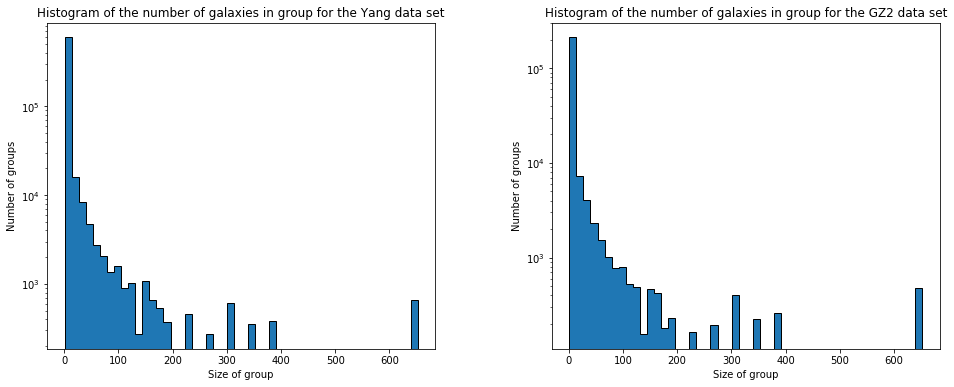

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of the all GZ2 galaxy magnitudes
ax[0].hist(group_data["group_size"], bins=50, edgecolor="black", histtype="stepfilled")
ax[0].set_yscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Number of groups")
ax[0].set_title("Histogram of the number of galaxies in group for the Yang data set")

# Plot histogram of the GZ2 galaxy magnitudes, which are classified as mergers
ax[1].hist(gz2_data["group_size"], bins=50, edgecolor="black", histtype="stepfilled")
ax[1].set_yscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Number of groups")
ax[1].set_title("Histogram of the number of galaxies in group for the GZ2 data set")

fig.subplots_adjust(wspace=0.3)

plt.show()

We can see that most groups are small in size, as there is a large peak near 0. To get an idea of the number of groups at each group size we will count the number of unique groups at each size and create a table of this data. We do this for both the Yang and GZ2 data sets.

In [3]:
# Create pandas dataframes
group_data_pandas = group_data.to_pandas()
gz2_data_pandas = gz2_data.to_pandas()

# Group data by group size, then count then unique number of groups and count the number of unique groups
group_data_group_counts = group_data_pandas.groupby("group_size")["group id_1"].unique().apply(lambda x: len(x))
gz2_data_group_counts = gz2_data_pandas.groupby("group_size")["group id_1"].unique().apply(lambda x: len(x))

# Create a dataframe and size column, easier to work with
group_data_group_counts = pd.DataFrame(group_data_group_counts)
group_data_group_counts.columns = ["Number of Groups"]
group_data_group_counts["size"] = group_data_group_counts.index

# Create a dataframe and size column, easier to work with
gz2_data_group_counts = pd.DataFrame(gz2_data_group_counts)
gz2_data_group_counts.columns = ["Number of Groups"]
gz2_data_group_counts["size"] = gz2_data_group_counts.index

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
group_data_group_counts_df = pd.DataFrame()
group_data_group_counts_df.loc[0, "groups"] = sum(group_data_group_counts["Number of Groups"])
group_data_group_counts_df.loc[0, "groups N=1"] = group_data_group_counts[group_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=2"] = group_data_group_counts[group_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=3"] = group_data_group_counts[group_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=4"] = group_data_group_counts[group_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N=5"] = group_data_group_counts[group_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
group_data_group_counts_df.loc[0, "groups N>5"] = sum(group_data_group_counts[group_data_group_counts["size"] > 5]["Number of Groups"])
group_data_group_counts_df = group_data_group_counts_df.astype(int)

# Create a new dataframe to be shown as a table, with the number of groups of a certain size as values
gz2_data_group_counts_df = pd.DataFrame()
gz2_data_group_counts_df.loc[0, "groups"] = sum(gz2_data_group_counts["Number of Groups"])
gz2_data_group_counts_df.loc[0, "groups N=1"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 1]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=2"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 2]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=3"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 3]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=4"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 4]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N=5"] = gz2_data_group_counts[gz2_data_group_counts["size"] == 5]["Number of Groups"].iloc[0]
gz2_data_group_counts_df.loc[0, "groups N>5"] = sum(gz2_data_group_counts[gz2_data_group_counts["size"] > 5]["Number of Groups"])
gz2_data_group_counts_df = gz2_data_group_counts_df.astype(int)

# Display tables
display(group_data_group_counts_df.style.set_caption("Yang group data:"))
display(gz2_data_group_counts_df.style.set_caption("GZ2 group data:"))

,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,473872,405947,44441,10721,4388,2329,6046


,groups,groups N=1,groups N=2,groups N=3,groups N=4,groups N=5,groups N>5
0,184379,140520,24942,7812,3530,2004,5571


As the plots suggested, most of the galaxies are in groups of only 1, with only very few groups of size > 5. Around 39% of groups in the Yang data set are also in the GZ2 data set, but this is skewed heavily by the number of N=1 groups, most of the larger groups have at least 1 galaxy also in GZ2.

As the number of galaxies in the GZ2 data set is considerably smaller than the number in the Yang group data set, we expect that many groups will have missing galaxies.
<br>
We would like to know how complete each GZ2 group is compared to the Yang groups, so we group the galaxies by their group id, and create a new column that gives the number of galaxies in each group that are also in the GZ2 data. This can be compared to the column which contains the size of the entire group allowing us to see how many galaxies we are missing.

In [4]:
# Creat a pandas dataframe from the astropy table so we can use the groupby method
gz2_data_pandas = gz2_data.to_pandas()

# Group galaxies by their group_id and create a new column with the number of galaxies in each group in the data set
gz2_data_pandas["GZ2_galaxies_in_group"] = gz2_data_pandas.groupby("group id_1")["group id_1"].transform("size")

# Create a new column with the number of galaxies missing from each group in the data set
gz2_data_pandas["galaxies_missing"] = gz2_data_pandas["group_size"] - gz2_data_pandas["GZ2_galaxies_in_group"]

# Create a new column with the fractional completeness of the group
gz2_data_pandas["group_completeness"] = gz2_data_pandas["GZ2_galaxies_in_group"] / gz2_data_pandas["group_size"]

# Turn the dataframe back into an astropy table and display the new columns
gz2_data = Table.from_pandas(gz2_data_pandas)
gz2_data[["group id_1", "group_size", "GZ2_galaxies_in_group", "galaxies_missing", "group_completeness"]][0:5]

group id_1,group_size,GZ2_galaxies_in_group,galaxies_missing,group_completeness
int32,int64,int64,int64,float64
3865,7,5,2,0.7142857142857143
4257,7,1,6,0.14285714285714285
62,88,63,25,0.7159090909090909
158,52,35,17,0.6730769230769231
1401,14,7,7,0.5


An example of the new columns we have created are shown above with the head of the data.

To see how the group completeness is spread, we create a scatter plot of group_completeness against group size.

Average completeness of groups N>=5: 0.4668498075922082
Average completeness of groups N>=10: 0.4766217188764667
Average completeness of groups N>=30: 0.5278119774835127


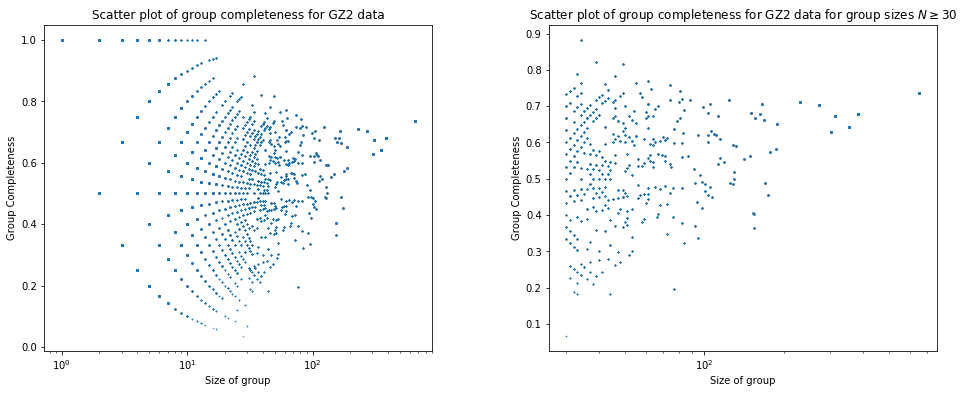

In [5]:
gz2_data_pandas = gz2_data.to_pandas()
groups_5 = gz2_data_pandas[gz2_data_pandas["group_size"] >= 5]
groups_5_completeness = groups_5.groupby("group id")["group_completeness"].mean().mean()
groups_10 = gz2_data_pandas[gz2_data_pandas["group_size"] >= 10]
groups_10_completeness = groups_10.groupby("group id")["group_completeness"].mean().mean()
groups_30 = gz2_data_pandas[gz2_data_pandas["group_size"] >= 30]
groups_30_completeness = groups_30.groupby("group id")["group_completeness"].mean().mean()
print("Average completeness of groups N>=5: " + str(groups_5_completeness))
print("Average completeness of groups N>=10: " + str(groups_10_completeness))
print("Average completeness of groups N>=30: " + str(groups_30_completeness))

fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Plot histogram of the all GZ2 galaxy magnitudes
ax[0].scatter(gz2_data["group_size"], gz2_data["group_completeness"], s=0.2)
ax[0].set_xscale("log")
ax[0].set_xlabel("Size of group")
ax[0].set_ylabel("Group Completeness")
ax[0].set_title("Scatter plot of group completeness for GZ2 data")

# Plot histogram of the GZ2 galaxy magnitudes, which are classified as mergers
ax[1].scatter(gz2_data[gz2_data["group_size"] >= 30]["group_size"], gz2_data[gz2_data["group_size"] >= 30]["group_completeness"], s=0.2)
ax[1].set_xscale("log")
ax[1].set_xlabel("Size of group")
ax[1].set_ylabel("Group Completeness")
ax[1].set_title("Scatter plot of group completeness for GZ2 data for group sizes $N \geq 30$")

fig.subplots_adjust(wspace=0.3)

plt.show()

On average, groups with $N \geq 10$ have an average group completeness of 0.477, and groups with $N \geq 30$ have an average group completeness of 0.528. The is a slight upward trend of group completeness with group size for larger groups, which can be seen from the second plot.

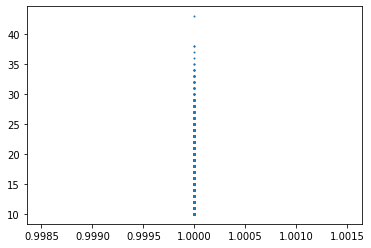

In [7]:
mergers = gz2_data[gz2_data["t06_odd_a14_yes_count"] >= 20]
mergers = mergers[mergers["t06_odd_a14_yes_debiased"] > 0.42]
mergers = mergers[mergers["t08_odd_feature_a24_merger_count"] >= 10]
mergers = mergers[mergers["t08_odd_feature_a24_merger_debiased"] > 0.42]

# mergers = gz2_data[gz2_data["t08_odd_feature_a24_merger_flag"] == 1]
gz2_data["t06_odd_a14_yes_debiased"]
mergers_group_1 = mergers[mergers["group_size"] == 1]
plt.scatter(mergers_group_1["group_size"], mergers_group_1["t08_odd_feature_a24_merger_count"], s=1)
plt.show()

In [ ]:
plt.scatter(group_data["group size"], group_data["t08_odd_feature_a24_merger_count"], s=0.2)
plt.show()

# mergers = group_data[group_data["t06_odd_a14_yes_count"] >= 20]
# mergers = mergers[mergers["t06_odd_a14_yes_debiased"] > 0.42]
# mergers = mergers[mergers["t08_odd_feature_a24_merger_debiased"] > 0.4]

mergers = group_data[group_data["t08_odd_feature_a24_merger_flag"] == 1]

mergers_group_1 = mergers[mergers["group size"] == 1]
plt.scatter(mergers["group size"], mergers["t08_odd_feature_a24_merger_count"], s=1)
plt.show()
print(len(mergers), len(mergers_group_1), print(len(mergers_group_1)/len(mergers)))